In [1]:
comment = 'bn_all_shuffle_lrd_098'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd#
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time

In [3]:
from Code.Models.c7o2h10_model import DeepPotential, train, normalize, backtransform
from Code.DataGeneration.saver import create_path

In [4]:
data_path = './Dataset/c7o2h10_X.npy'
label_path = './Dataset/c7o2h10_Y.npy'
train_ids_path = './Dataset/iso17/train_ids.txt'
test_ids_path = './Dataset/iso17/validation_ids.txt'
model_path = './ModelCheckpoints/c7o2h10/'
model_path = './ModelCheckpoints/c7o2h10/{}/'.format(comment)

In [5]:
use_cuda = torch.cuda.is_available()
print('use cuda:  ', use_cuda)

use cuda:   True


# Read the Data

In [6]:
train_ids = (np.loadtxt(train_ids_path) - 1).astype(int).tolist()
test_ids = (np.loadtxt(test_ids_path) - 1).astype(int).tolist()

In [7]:
X_npy = np.load(data_path)
Y_npy = np.load(label_path) * -1
Y_npy, Y_min, Y_max = normalize(Y_npy)
X_npy.shape

(404000, 19, 72)

### Split into test and train

In [8]:
X_train_npy, X_test_npy = X_npy[train_ids], X_npy[test_ids]
Y_train_npy, Y_test_npy = Y_npy[train_ids], Y_npy[test_ids]

In [9]:
X_train = Variable(torch.Tensor(X_train_npy))
Y_train = Variable(torch.Tensor(Y_train_npy), requires_grad=False)
X_test = Variable(torch.Tensor(X_test_npy))
Y_test = Variable(torch.Tensor(Y_test_npy), requires_grad=False)

## Test Model

0:	test scoore:     0.2259		train scoore:     0.4843
1:	test scoore:     0.2169		train scoore:     0.5432
2:	test scoore:     0.1974		train scoore:     0.4803
3:	test scoore:     0.1960		train scoore:     0.4928
4:	test scoore:     0.1833		train scoore:     0.5637
5:	test scoore:     0.1834		train scoore:     0.4754
6:	test scoore:     0.1638		train scoore:     0.4008
7:	test scoore:     0.1588		train scoore:     0.4805
8:	test scoore:     0.1494		train scoore:     0.4420
9:	test scoore:     0.1484		train scoore:     0.4775
10:	test scoore:     0.1445		train scoore:     0.3362
11:	test scoore:     0.1462		train scoore:     0.3249
12:	test scoore:     0.1367		train scoore:     0.4003
13:	test scoore:     0.1341		train scoore:     0.3465
14:	test scoore:     0.1377		train scoore:     0.3210
15:	test scoore:     0.1264		train scoore:     0.3694
16:	test scoore:     0.1276		train scoore:     0.3606
17:	test scoore:     0.1254		train scoore:     0.3766
18:	test scoore:     0.1210		train sco

151:	test scoore:     0.0778		train scoore:     0.4419
152:	test scoore:     0.0769		train scoore:     0.4445
153:	test scoore:     0.0774		train scoore:     0.4423
154:	test scoore:     0.0770		train scoore:     0.4436
155:	test scoore:     0.0773		train scoore:     0.4433
156:	test scoore:     0.0776		train scoore:     0.4474
157:	test scoore:     0.0772		train scoore:     0.4501
158:	test scoore:     0.0766		train scoore:     0.4506
159:	test scoore:     0.0770		train scoore:     0.4529
160:	test scoore:     0.0775		train scoore:     0.4489
161:	test scoore:     0.0768		train scoore:     0.4482
162:	test scoore:     0.0774		train scoore:     0.4519
163:	test scoore:     0.0773		train scoore:     0.4480
164:	test scoore:     0.0769		train scoore:     0.4481
165:	test scoore:     0.0773		train scoore:     0.4470
166:	test scoore:     0.0777		train scoore:     0.4472
167:	test scoore:     0.0770		train scoore:     0.4415
168:	test scoore:     0.0768		train scoore:     0.4424
169:	test 

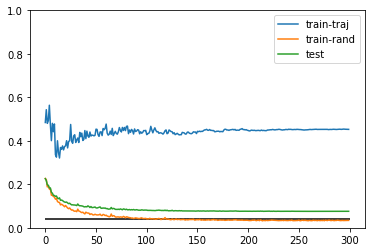

In [13]:
test_scoores = []
train_scoores = []
train_rand_scoores = []
create_path('./error_plots/{}'.format(comment))
for i in range(300):
    ids_rand = np.random.randint(0, 400000, 1064)
    ids = np.arange(0, 1064)*-1
    test_model = DeepPotential()
    test_model.load_state_dict(torch.load(f'{model_path}epoch_{i}', map_location=lambda storage, loc: storage))
    test_result = np.squeeze(backtransform(test_model(X_test), Y_min, Y_max).detach().numpy())
    val_result = np.squeeze(backtransform(Y_test, Y_min, Y_max).detach().numpy())
    test_scoore = np.round(np.mean(np.abs(test_result - val_result)), 4)
    test_result = np.squeeze(backtransform(test_model(X_train[ids]), Y_min, Y_max).detach().numpy())
    val_result = np.squeeze(backtransform(Y_train[ids], Y_min, Y_max).detach().numpy())
    train_scoore = np.round(np.mean(np.abs(test_result - val_result)), 4)
    test_result = np.squeeze(backtransform(test_model(X_train[ids_rand]), Y_min, Y_max).detach().numpy())
    val_result = np.squeeze(backtransform(Y_train[ids_rand], Y_min, Y_max).detach().numpy())
    train_rand_scoore = np.round(np.mean(np.abs(test_result - val_result)), 4)
    print('{}:\ttest scoore: {:10.4f}\t\ttrain scoore: {:10.4f}'.format(i, test_scoore, train_scoore))
    test_scoores.append(test_scoore)
    train_scoores.append(train_scoore)
    train_rand_scoores.append(train_rand_scoore)

print('Done')
plt.plot(train_scoores, label='train-traj')
plt.plot(train_rand_scoores, label='train-rand')
plt.plot(test_scoores, label='test')
plt.hlines(0.04, 0, len(train_scoores))
plt.legend()
plt.ylim([0, 1])
plt.savefig('./error_plots/{}/abs_error_{}'.format(comment, int(time.time())))

In [ ]:
test_model = DeepPotential()
test_model.load_state_dict(torch.load(f'ModelCheckpoints/c7o2h10/epoch_{i-1}', map_location=lambda storage, loc: storage))    
single_scoores = []
for data_point in range(X_train.shape[0]):
    test_result = np.squeeze(backtransform(test_model(X_train[data_point].reshape(1, 19, 72)), Y_min, Y_max).detach().numpy())
    val_result = np.squeeze(backtransform(Y_train[data_point].reshape(1, 19, 72), Y_min, Y_max).detach().numpy())
    train_scoore = np.round(np.mean(np.abs(test_result - val_result)), 4)
    single_scoores.append(train_scoore)
    print(data_point/X_train.shape, )

In [ ]:
X_train[0].reshape(1, 19, 72).shape

In [17]:
test_result = np.squeeze(backtransform(test_model(X_train[ids_rand]), Y_min, Y_max).detach().numpy())
val_result = np.squeeze(backtransform(Y_train[ids_rand], Y_min, Y_max).detach().numpy())
scoore = np.mean(np.abs(test_result - val_result))

In [18]:
test_result[:15]

array([11502.95 , 11502.713, 11504.378, 11503.955, 11502.715, 11504.99 ,
       11503.388, 11505.568, 11503.333, 11503.893, 11503.283, 11504.239,
       11505.013, 11502.357, 11504.359], dtype=float32)

In [19]:
val_result[:15]

array([11502.927, 11502.725, 11504.4  , 11503.99 , 11502.724, 11504.96 ,
       11503.386, 11505.575, 11503.521, 11503.944, 11503.272, 11504.272,
       11505.014, 11502.385, 11504.315], dtype=float32)

In [ ]:
scoore

In [22]:
test_result = np.squeeze(backtransform(test_model(X_test), Y_min, Y_max).detach().numpy())
val_result = np.squeeze(backtransform(Y_test, Y_min, Y_max).detach().numpy())

In [28]:
test_diff = np.abs(test_result - val_result)

In [29]:
sort = val_result.argsort()

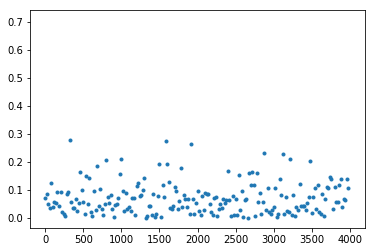

In [36]:
plt.plot(test_diff[sort], '.',markevery=20)

In [23]:
test_result[:100]

array([11503.739 , 11504.257 , 11503.785 , 11504.209 , 11504.19  ,
       11503.956 , 11503.8955, 11504.202 , 11503.817 , 11503.663 ,
       11504.18  , 11504.101 , 11504.135 , 11504.202 , 11504.173 ,
       11503.963 , 11503.749 , 11504.233 , 11504.006 , 11504.045 ,
       11503.996 , 11503.992 , 11504.061 , 11503.967 , 11503.94  ,
       11504.312 , 11503.826 , 11503.817 , 11504.011 , 11503.715 ,
       11504.202 , 11503.742 , 11503.921 , 11503.581 , 11503.391 ,
       11503.43  , 11503.524 , 11503.556 , 11503.718 , 11503.508 ,
       11502.898 , 11503.224 , 11502.977 , 11503.242 , 11504.079 ,
       11503.815 , 11503.552 , 11503.519 , 11503.718 , 11503.197 ,
       11503.6875, 11503.486 , 11503.283 , 11503.611 , 11503.289 ,
       11503.825 , 11503.797 , 11503.519 , 11503.525 , 11503.676 ,
       11503.599 , 11503.346 , 11503.616 , 11503.365 , 11503.926 ,
       11503.5   , 11503.676 , 11503.63  , 11502.669 , 11502.743 ,
       11502.126 , 11502.081 , 11502.216 , 11502.539 , 11502.7

In [24]:
val_result[:100]

array([11503.688 , 11504.342 , 11503.724 , 11504.196 , 11504.142 ,
       11503.831 , 11503.885 , 11504.136 , 11503.706 , 11503.712 ,
       11504.175 , 11504.101 , 11504.279 , 11504.198 , 11504.148 ,
       11503.883 , 11503.714 , 11504.116 , 11503.9795, 11504.258 ,
       11503.987 , 11503.907 , 11504.168 , 11504.013 , 11503.939 ,
       11504.332 , 11503.896 , 11503.76  , 11504.126 , 11503.83  ,
       11504.289 , 11503.731 , 11503.883 , 11503.516 , 11503.4   ,
       11503.444 , 11503.458 , 11503.566 , 11503.685 , 11503.447 ,
       11502.862 , 11503.181 , 11502.981 , 11503.211 , 11504.017 ,
       11503.683 , 11503.534 , 11503.603 , 11503.761 , 11503.174 ,
       11503.66  , 11503.43  , 11503.341 , 11503.527 , 11503.381 ,
       11503.733 , 11503.859 , 11503.406 , 11503.479 , 11503.617 ,
       11503.765 , 11503.41  , 11503.776 , 11503.428 , 11503.794 ,
       11503.525 , 11503.773 , 11503.782 , 11502.608 , 11502.796 ,
       11502.147 , 11502.081 , 11502.261 , 11502.59  , 11502.8

# Testing

## Test normalize function:

In [ ]:
Y_load = np.load(label_path) * -1
Y_normed, Y_min, Y_max = normalize(Y_load)
Y_back = backtransform(Y_normed, Y_min, Y_max)
np.testing.assert_array_almost_equal(Y_back, Y_load)

In [ ]:
x = np.arange(0, 9).reshape(3, 3)

In [ ]:
x

In [ ]:
shuffle = np.arange(0, 3)
np.random.shuffle(shuffle)
shuffle

In [ ]:
x[shuffle]